<a href="https://colab.research.google.com/github/JackR42/AI-001/blob/main/MNIST_DL_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# We can load the MNIST dataset directly using .npz file
!wget 'https://raw.githubusercontent.com/Rylu12/MNIST_Computer_Vision/master/mnist.npz' -O mnist.npz
data = np.load('/content/mnist.npz', allow_pickle=True)
data_list = data.files

--2022-11-08 22:02:18--  https://raw.githubusercontent.com/Rylu12/MNIST_Computer_Vision/master/mnist.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11490434 (11M) [application/octet-stream]
Saving to: ‘mnist.npz’

mnist.npz           100%[===================>]  10.96M  --.-KB/s    in 0.07s   

2022-11-08 22:02:18 (166 MB/s) - ‘mnist.npz’ saved [11490434/11490434]



In [28]:
# Now we can separate the dataframe into individual variables
# No data cleaning needed

x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

In [29]:
#Check to make sure if shape is correct, should be (60000, 28, 28)
x_train.shape

(60000, 28, 28)

In [30]:
x_train[0].shape

(28, 28)

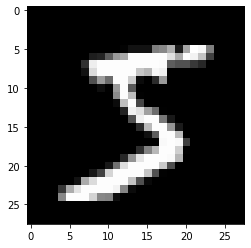

In [31]:
plt.imshow(x_train[0], cmap = 'gray')

In [32]:
#Now need to split 10% of the train dataset to use as validation dataset
from sklearn.model_selection import train_test_split

#Using the train_test_split library to split into train and validation

x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

In [33]:
x_train.shape

(54000, 28, 28)

In [34]:
x_validation.shape

(6000, 28, 28)

## Now need to convert y_data into categorical type

In [35]:
#Need to do one-hot encode into individual categories for training purposes

In [36]:
from keras.utils.np_utils import to_categorical

In [37]:
# Can use keras to do one-hot encoding into dummy variables
# Using to_categorical() method
# Can also use pandas dummy variable method if working with dataframes

In [38]:
# Create into 10 categories
y_train_categ = to_categorical(y_train, 10)
y_test_categ = to_categorical(y_test, 10)
y_validation_categ = to_categorical(y_validation, 10)

In [39]:
# Check to make sure it worked
y_train_categ

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Need to preprocess by doing feature scaling of data first

In [40]:
#Scale data by dividing all values by 255
#Data will be normalized and fit betw value of 0 and 1

In [41]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()
x_validation = x_validation/x_validation.max()

In [42]:
# Need to reshape to show 4th dimension

In [43]:
# Since only one color and not RGB... just add the value "1" in 4th dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_validation = x_validation.reshape(x_validation.shape[0], 28, 28, 1)

In [44]:
# Check to see if reshape worked
x_train.shape

(54000, 28, 28, 1)

## Now time to train with Keras using CNN

In [45]:
#Images are best trained using Convolutional Neural Networks
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [46]:
model = Sequential()

#Convlutional Layer
c_layer = Conv2D(filters =32, kernel_size = (4,4), input_shape = (28, 28, 1), activation = 'relu')

#Pooling Layer
p_layer = MaxPool2D(pool_size = (2,2))

#Flatten Layer (2D --> 1D)
f_layer = Flatten()

#Dense Layer (hidden layers)
d_layer1 = Dense(128, activation = 'relu')

#Use softmax activation function to output probability value betw 0-1
d_layer2 = Dense(10, activation = 'softmax')

model.add(c_layer)
model.add(p_layer)
model.add(f_layer)
model.add(d_layer1)
model.add(d_layer2)

In [47]:
# Need to minimize "loss" function and not "cost" function, so use categorical_crossentropy since y_data already one-hot encoded
# Use "adaptive moment estimation" (adam) gradient descent optimizer
model.compile( optimizer = 'adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [49]:
#Now time to train model using both train and validation datasets

#Set a stopper if validation_loss starts to increase again, to prevent overtraining
early_stopping = tf.keras.callbacks.EarlyStopping(patience =2)

model.fit(x_train, y_train_categ, epochs = 10, batch_size = 128, validation_data = (x_validation, y_validation_categ), callbacks =[early_stopping], verbose = 2)

Epoch 1/10
422/422 - 25s - loss: 0.2282 - accuracy: 0.9351 - val_loss: 0.0920 - val_accuracy: 0.9733 - 25s/epoch - 58ms/step
Epoch 2/10
422/422 - 22s - loss: 0.0701 - accuracy: 0.9788 - val_loss: 0.0587 - val_accuracy: 0.9828 - 22s/epoch - 53ms/step
Epoch 3/10
422/422 - 23s - loss: 0.0462 - accuracy: 0.9866 - val_loss: 0.0485 - val_accuracy: 0.9858 - 23s/epoch - 56ms/step
Epoch 4/10
422/422 - 23s - loss: 0.0350 - accuracy: 0.9894 - val_loss: 0.0464 - val_accuracy: 0.9855 - 23s/epoch - 56ms/step
Epoch 5/10
422/422 - 23s - loss: 0.0260 - accuracy: 0.9922 - val_loss: 0.0419 - val_accuracy: 0.9880 - 23s/epoch - 56ms/step
Epoch 6/10
422/422 - 22s - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.0493 - val_accuracy: 0.9853 - 22s/epoch - 53ms/step
Epoch 7/10
422/422 - 23s - loss: 0.0150 - accuracy: 0.9955 - val_loss: 0.0403 - val_accuracy: 0.9887 - 23s/epoch - 56ms/step
Epoch 8/10
422/422 - 22s - loss: 0.0116 - accuracy: 0.9967 - val_loss: 0.0406 - val_accuracy: 0.9908 - 22s/epoch - 53ms/step


In [50]:
model.metrics_names

['loss', 'accuracy']

In [51]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_categ)

313/313 [==============================] - 2s 6ms/step - loss: 0.0450 - accuracy: 0.9861


In [52]:
test_accuracy

0.9861000180244446

In [53]:
test_loss

0.04498830437660217

## Let's save the model first

In [57]:
from keras.models import load_model

#To save keras model
model.save('mnist_DL_pretrained.h5')

#To load keras model for forward propagation, uncomment line below
model = load_model('mnist_DL_pretrained.h5')

In [58]:
#Can do predictions to check results using classification_report
from sklearn.metrics import classification_report

In [61]:
#prediction = model.predict_classes(x_test) #depricated!
predict_x = model.predict(x_test) 
classes_x = np.argmax(predict_x,axis=1)

313/313 [==============================] - 2s 6ms/step


In [62]:
predict_x
classes_x

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
#Prediction is not one-hot encoded, so need normal "y_test" data as comparison, not "y_test_categ" data
#Get f1-score

In [64]:
print(classification_report(y_test, classes_x))
#f1-score is 99% which is extremely good

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       1.00      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# The predict() method returns probability values and not classes (number results)

In [65]:
one_image = model.predict(x_test[1].reshape(1,28, 28, 1))

1/1 [==============================] - 0s 17ms/step


In [66]:
one_image

array([[1.7647288e-11, 3.6813717e-08, 1.0000000e+00, 3.7726095e-14,
        2.2216012e-17, 1.6728204e-15, 4.4667151e-10, 9.2914932e-15,
        3.6241531e-11, 5.5503422e-15]], dtype=float32)

In [67]:
table = pd.DataFrame()
table['Numbers'] = np.arange(0,10)
table['Prob %'] = one_image[0].round(2)*100

In [68]:
table

,Numbers,Prob %
0,0,0.0
1,1,0.0
2,2,100.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0


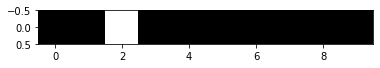

In [69]:
plt.imshow(one_image, cmap ='gray')